# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Tamem Ahmed

ID: 52-10996

Tutorial: T-02

---

Name: Omar Hegazy

ID: 52-9494

Tutorial: T-02

---

Name: Youssef Kamal

ID: 52-0306

Tutorial: T-02

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df

<ipython-input-60-a3b8ae2b1bd1>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


## Data Inspection

In [61]:
# Inspect the types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [82]:
# Inspect the statistics of the numerical columns and info of the categorical columns
pd.set_option("display.float_format", "{:.2f}".format)
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032.00,7032,7032,7032.00,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,61,8,5163
mean,NaN,NaN,0.16,NaN,NaN,32.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Inspect null values
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [62]:
#Checks the unique values for each column
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [54]:
# Checks the number of unique values for each column
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [55]:
# Inspects the count of each value in each column
for column in df.columns:
    print(f"{column}: Count of {df[column].value_counts()}")
    print("==========================================================")

customerID: Count of 7590-VHVEG    1
9128-CPXKI    1
0961-ZWLVI    1
6595-COKXZ    1
5760-FXFVO    1
             ..
7089-RKVSZ    1
0020-INWCK    1
7874-ECPQJ    1
9796-MVYXX    1
3186-AJIEK    1
Name: customerID, Length: 6976, dtype: int64
gender: Count of Male      3549
Female    3483
Name: gender, dtype: int64
SeniorCitizen: Count of 0    5890
1    1142
Name: SeniorCitizen, dtype: int64
Partner: Count of No     3639
Yes    3393
Name: Partner, dtype: int64
Dependents: Count of No     4933
Yes    2099
Name: Dependents, dtype: int64
tenure: Count of 1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
PhoneService: Count of Yes    6352
No      680
Name: PhoneService, dtype: int64
MultipleLines: Count of No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
InternetService: Count of Fiber optic    3096
DSL            2416
No             

## Data Cleaning

In [63]:
# Replace "No internet service" with "No" in relevant columns
internet_related_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[internet_related_cols] = df[internet_related_cols].replace({'No internet service': 'No'})

# Replace "No phone service" with "No" in the 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [64]:
# Removing the $ sign and /m from MonthlyCharges
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract('(\d+\.?\d*)')

# converting MonthlyCharges from object to float
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,$306.6,Yes


In [65]:
# Dropping customer id and total charges columns since the total charges is redundant and have null values while the customer id
# because it is useless and also have null values
df.drop(['customerID', 'TotalCharges'], axis="columns", inplace=True)

# removing them from the categorical_col list
categorical_col.remove('TotalCharges')
categorical_col.remove('customerID')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

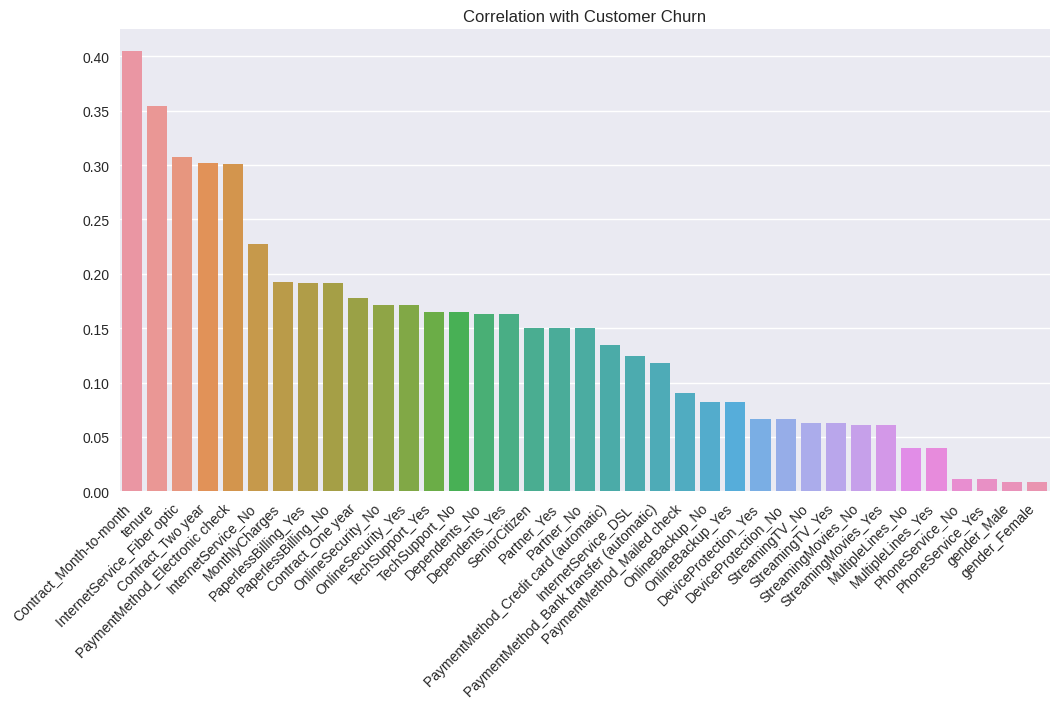

In [68]:
# copying the datafram into df_encoded variable
df_encoded = df.copy()

# one-hot encoding all categorical attributes to calculate the correlation with churn
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod', 'Churn'])

# Calculates the correlations
correlation_matrix = df_encoded.corr()

# Extracts correlations with 'Churn'
churn_correlations = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)

# Remove 'Churn' from the list
churn_correlation = churn_correlations.drop(['Churn_No', 'Churn_Yes'])


# Plotting the correlations of the encoded attributes with churn
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values)
plt.title("Correlation with Customer Churn")
plt.xticks(rotation=45, ha="right")
plt.show()

**Answer for Q1**: The most correlated attributes with churn is Contract_Month-month then, tunure then, InternetService_ Fiber optic then, Contract_Two year and then, PaymentMethod_Electronic check.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

Text(0.5, 0, 'Payment Method')

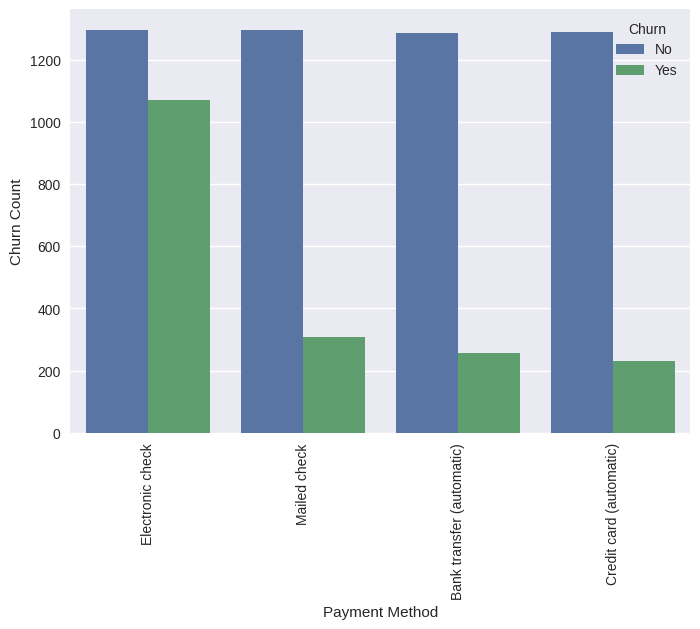

In [69]:
# Plotting the payment method categories with the churn
g = sns.countplot(x='PaymentMethod', hue='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Count')
plt.xlabel('Payment Method')

**Answer for Q2**: Electronic Check has the highest churn rate



**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

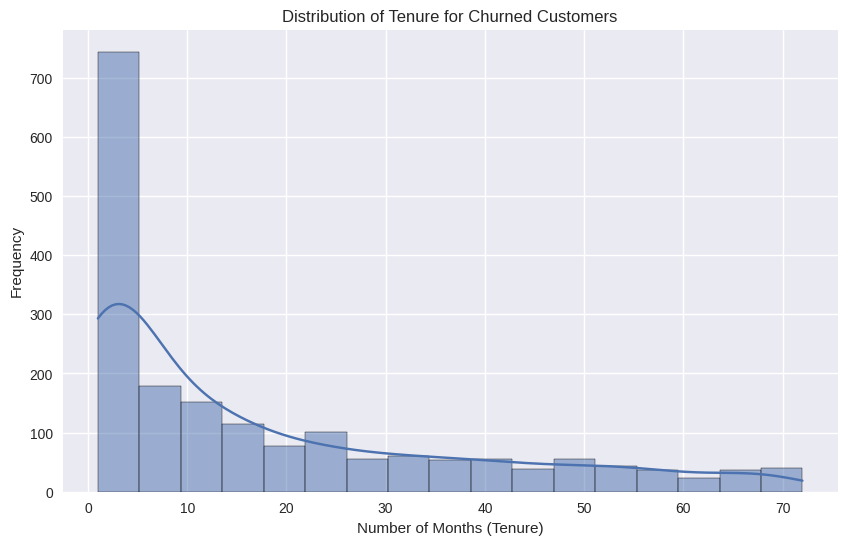

In [70]:
# Filter the data for customers who churned
churned_customers = df[df['Churn'] == 'Yes']

# Plot the distribution of 'tenure' for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], kde=True)
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Number of Months (Tenure)')
plt.ylabel('Frequency')
plt.show()

**Answer for Q3**: According to the peak in the histrogram, the most common tenure when customers churn is between 1 to 5 months.

## Data Preparation for Modelling

In [71]:
# copying the data frame to df_encoded again to reset it
df_encoded = df.copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [72]:
# one-hot encoding categorical variable except churn this time
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'])
df_encoded.info()

In [73]:
# turning the churn into nominal categorization of 0s and 1s instead of no and yes and 0 is no and yes is 1
df_encoded['Churn'] = df_encoded['Churn'].astype('category').cat.codes

# Calculate correlations of churn to see useless attributes
correlation_matrix = df_encoded.corr()

# view the highest and lowest correlated attributes to churn
print(correlation_matrix['Churn'].abs().sort_values(ascending=False))

Churn                                      1.000000
Contract_Month-to-month                    0.404565
tenure                                     0.354049
InternetService_Fiber optic                0.307463
Contract_Two year                          0.301552
PaymentMethod_Electronic check             0.301455
InternetService_No                         0.227578
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
PaperlessBilling_No                        0.191454
Contract_One year                          0.178225
OnlineSecurity_No                          0.171270
OnlineSecurity_Yes                         0.171270
TechSupport_Yes                            0.164716
TechSupport_No                             0.164716
Dependents_No                              0.163128
Dependents_Yes                             0.163128
SeniorCitizen                              0.150541
Partner_Yes                                0.149982
Partner_No  

In [74]:
# Dropping every column that has low correlation with churn since they are useless

# List of columns to drop
attributes_to_drop = [
    'PaymentMethod_Mailed check',
    'OnlineBackup_No',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'DeviceProtection_No',
    'StreamingTV_No',
    'StreamingTV_Yes',
    'StreamingMovies_No',
    'StreamingMovies_Yes',
    'MultipleLines_No',
    'MultipleLines_Yes',
    'PhoneService_No',
    'PhoneService_Yes',
    'gender_Male',
    'gender_Female'
]

# Drop the specified columns
df_encoded.drop(attributes_to_drop, axis="columns", inplace=True)
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [39]:
# Splitting the data into a training dataset and a testing dataset to test the model's accuracy in making predictions on new data.
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [40]:
# Calling the DecisionTreeClassifier method into a variable to control the model's learning process.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [53]:
# plotting the decision tree graph
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# A method that prints out some of the model's performance metrics
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.74%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997238     0.997694  0.997359     0.997466      0.997359
recall        0.999170     0.992355  0.997359     0.995762      0.997359
f1-score      0.998203     0.995017  0.997359     0.996610      0.997357
support    3614.000000  1308.000000  0.997359  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [  10 1298]]

Test Result:
Accuracy Score: 71.94%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.815425    0.473862  0.719431     0.644643      0.724611
recall        0.798580    0.500891  0.719431     0.649735      0.719431
f1-score      0.806915    0.487002  0.719431     0.646958      0.721857
support    1549.000000  561.000000  

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score

# gets the scores of percision, recall and f1
pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.47386172006745364
Recall:  0.5008912655971479
F1_score:  0.48700173310225303


The model has a Precision of 0.47 which means that 47% of the total churn predictions were correctly predicted. Also, the model has a Recall of 0.5 which is 50% of all real churn cases were correclty predicted. Finally, the model has F1 Score of 0.49 which is 49% which suggests a moderate performance of the model. It indicates that the model is achieving a reasonable balance between precision and recall.

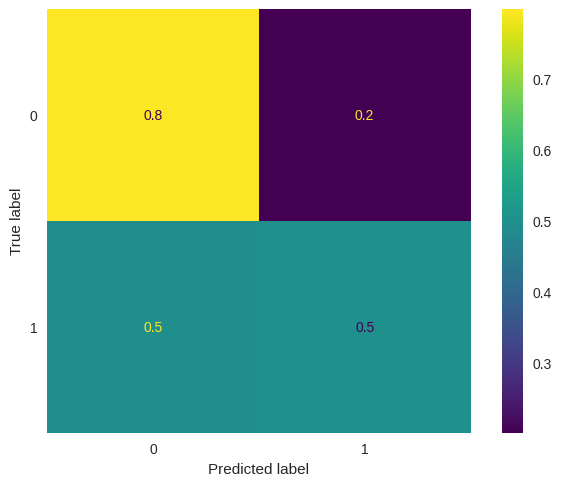

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# views the confustion matrix to show a summary of prediction results of the classifier
cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

## Bonus (Optional)